# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('real_estate_data.csv', sep='\t')

In [3]:
df.head(2)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0


In [4]:
df.shape

(23699, 22)

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

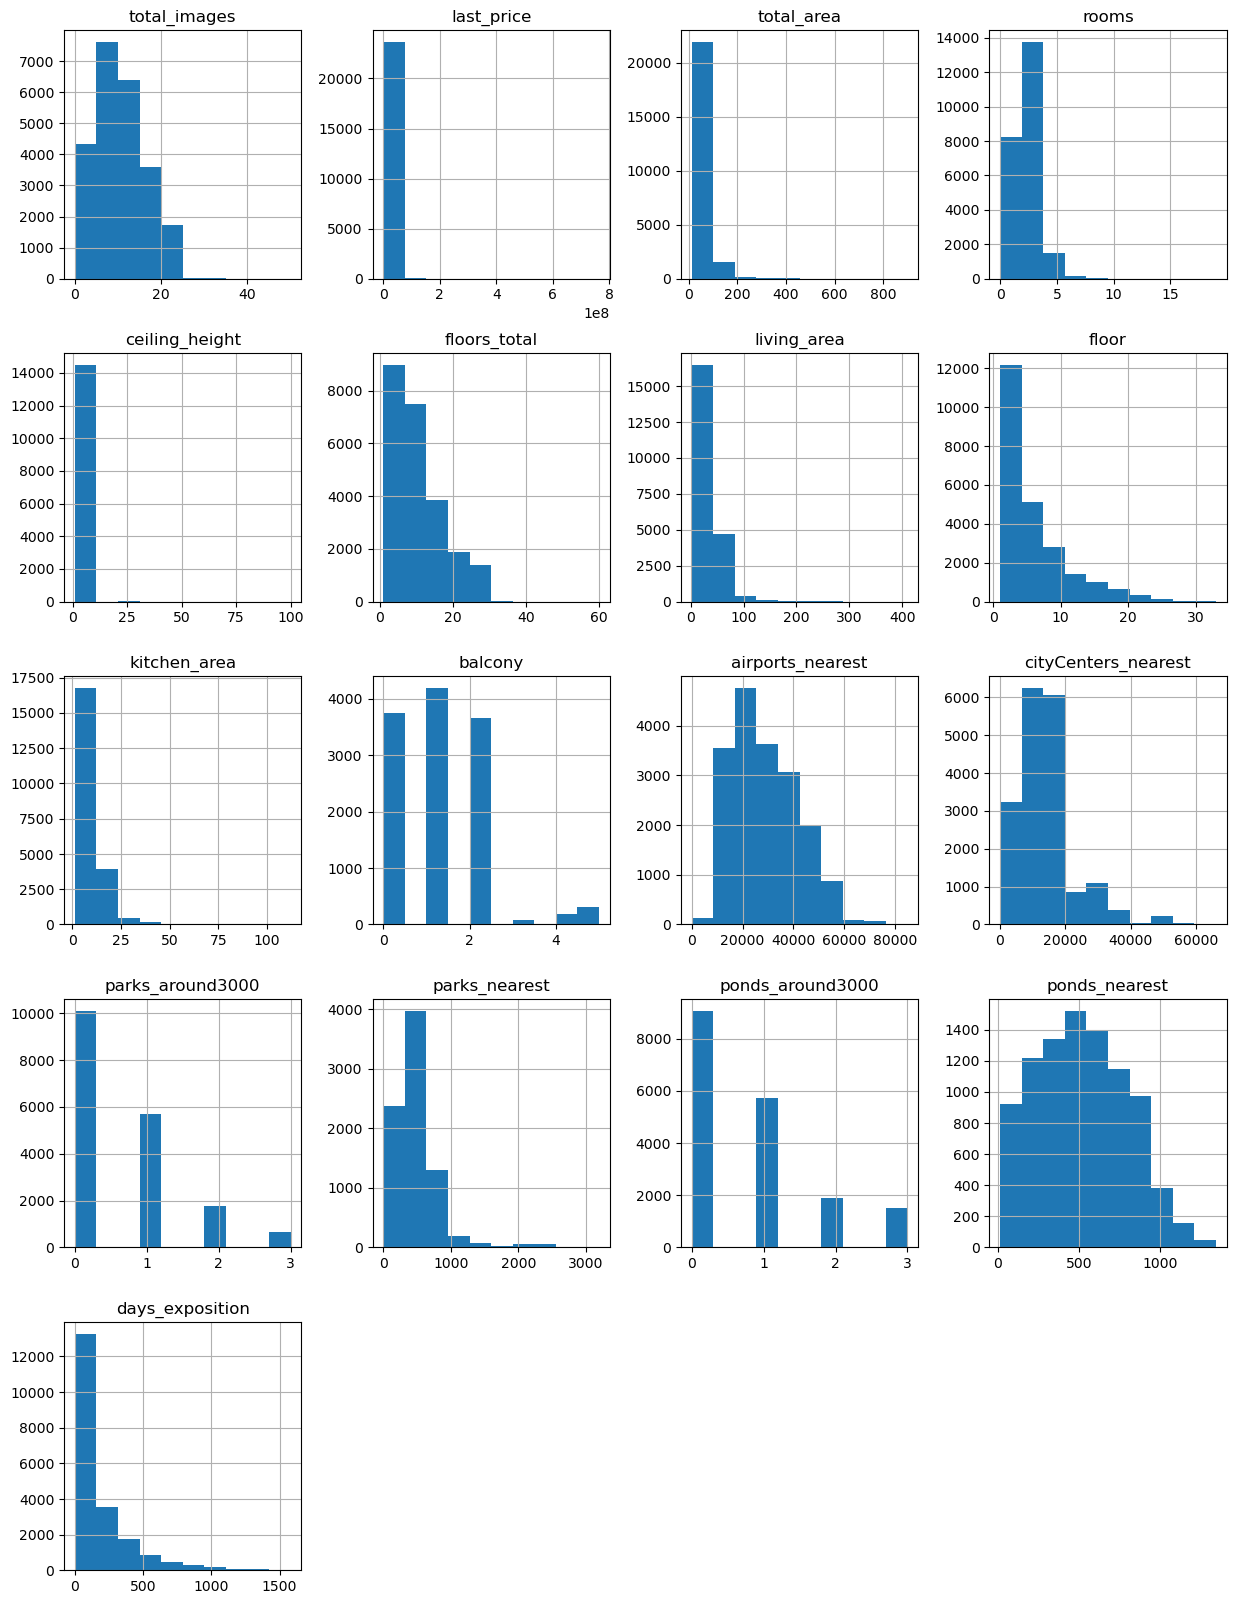

In [5]:
df.hist(figsize=(15, 20))

### Предобработка данных


#### Посмотрим какие поля сколько пропусков содержат:

<AxesSubplot:>

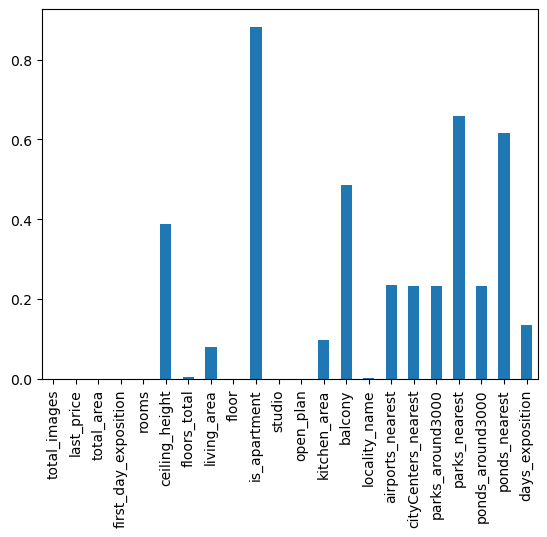

In [6]:
df.isna().mean().plot.bar()

Больше всего пропусков содержат следующие поля:<br>
<ul>
    <li></li>
    <li></li>
    <li></li>
</ul>
В случае с колличеством балконов, наличием в приделах 3000 м. парков и прудов, отсутствие данных можно приранятьотсутствию таких объектов, т.е. заменить пропущенные значения на ноль.


In [7]:
df['balcony'] = df['balcony'].fillna(0)
df['parks_around3000'] = df['parks_around3000'].fillna(0)
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)

К пропускам данных могли привести следующие факторы:<bк>

#### Рассмотрим типы данных в столбцах

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Большенство числовых значений представленны в формате float64. Даже если признак может быть выражен целым числов из-за наличия пропусков столбец будет преобразован в формат вещесвтвенных чисел, т.к. значение NaN к этому формату данных.<br><br>
Поле 'first_day_exposition' – содержит даты, но в формате object. Переведем значаения этого столбца в формат datetime (Timestamp), для удобной манируляции данными при работе.

In [9]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dt%H:%M:%S')

In [10]:
type(df['first_day_exposition'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [11]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

#### Изучим уникальные значения в столбце с названиями и устраним неявные дубликаты:

In [12]:
len(df['locality_name'].unique())

365

In [13]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [14]:
df['locality_name'] = df['locality_name'].str.replace('ё', 'е')
df['locality_name'] = df['locality_name'].str.replace('городской поселок', 'поселок')
df['locality_name'] = df['locality_name'].str.replace('поселок городского типа', 'поселок')
df['locality_name'] = df['locality_name'].str.replace('село', '')
df['locality_name'] = df['locality_name'].str.replace('деревня', '')


In [15]:
len(df['locality_name'].unique())

323

#### Найдём и устраним редкие и выбивающиеся значения

Поле `total_images` может влиять на привлекательность объявление, но врядли повлияет на стоимость объекта.
Поэтому, начнем с поля `'last_price'`:

<AxesSubplot:>

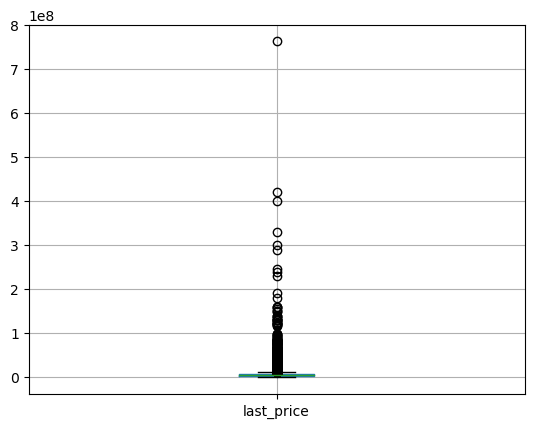

In [16]:
df.boxplot('last_price')

Какой-то объект явно вылетел в космос, посмотрим на него:

<AxesSubplot:>

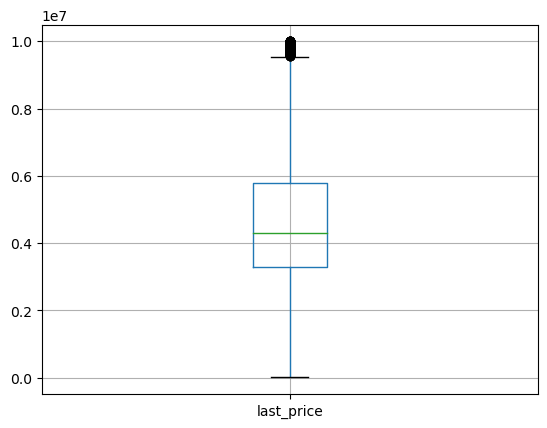

In [17]:
df.query('last_price < 10000000').boxplot('last_price')

In [18]:
df[df['last_price'] == df['last_price'].max()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
12971,19,763000000.0,400.0,2017-09-30,7,NaN,10.0,250.0,10,NaN,...,NaN,2.0,Санкт-Петербург,25108.0,3956.0,1.0,530.0,3.0,756.0,33.0


400 кв. метров, 4 км. от центра Питера, т.к. я не знаток luxury недвижимости, понятия не имею насколько это адекватно. Посмотрим какая доля объектов недвижимости с ценой выше 10 млн.

In [19]:
df[df['last_price'] > 100000000]['last_price'].count() / df['last_price'].count() *100

0.15612473100130808

0.15 % – Думаю такие объекты можно исключить из анализа, т.к. их число не велико, но они могут сильно исказить результаты:

In [20]:
df = df[df['last_price'] < 100000000]

Далее рассмотрим поле `'total_area'`:

<AxesSubplot:>

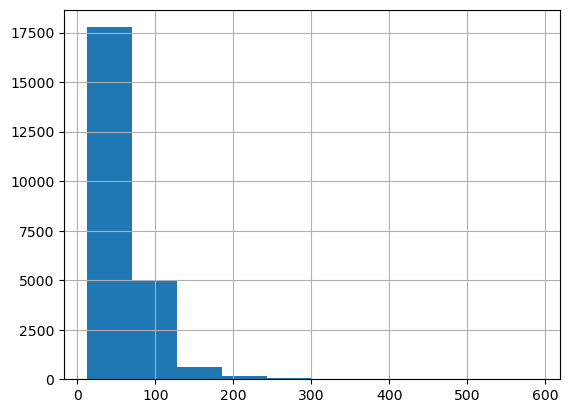

In [21]:
df['total_area'].hist()

<AxesSubplot:>

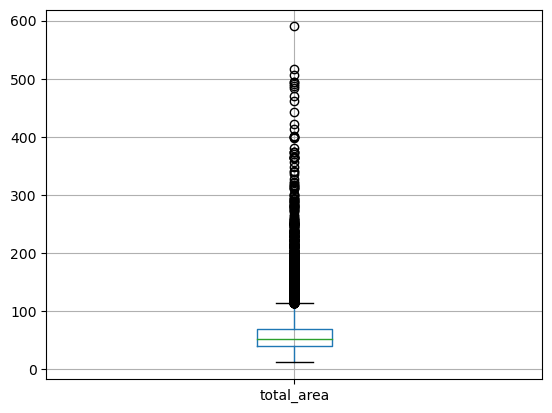

In [22]:
df.boxplot('total_area')

In [23]:
df['total_area'].max()

590.0

590 кв.метров – это конечно очень большая квартира, но в принципе, какой-нибудь пентхаус может занимать такую площадь. Не думаю, что здесь закралась ошибка

Далее рассмотрим  поле `'first_day_exposition'`:

In [24]:
print('MIN first_day_exposition:', df['first_day_exposition'].min())
print('MAX first_day_exposition:', df['first_day_exposition'].max())

MIN first_day_exposition: 2014-11-27 00:00:00
MAX first_day_exposition: 2019-05-03 00:00:00


<AxesSubplot:>

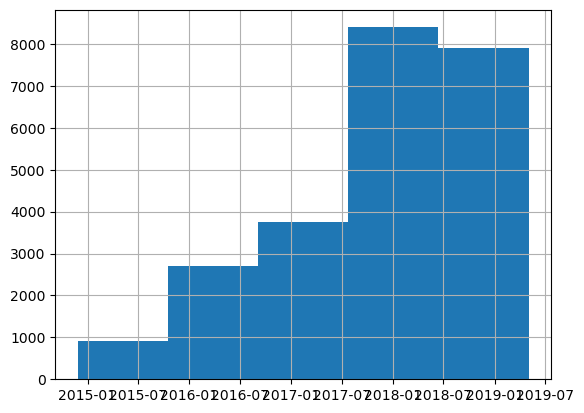

In [25]:
df['first_day_exposition'].hist(bins=5) # 5 – это 5 лет

Видимо, данные накапливались постепенно. Выглядит адекватно, публикаций времён династии Романовых нет, объявлений из будущего тоже.

Далее рассмотрим поле `'rooms'`:

<AxesSubplot:>

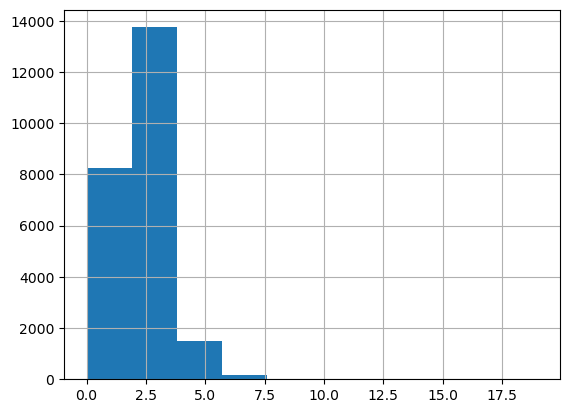

In [26]:
df['rooms'].hist()

In [27]:
df['rooms'].max()

19

19 комнат. Посмотрим на этот объек поближе:

In [28]:
df[df['rooms'] == df['rooms'].max()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
14498,6,32250000.0,374.6,2018-06-09,19,NaN,5.0,264.5,2,NaN,...,27.6,0.0,Санкт-Петербург,19497.0,3574.0,0.0,NaN,2.0,548.0,114.0


In [29]:
# рассчитаем среднюю площадь на одну комнату
df[df['rooms'] == df['rooms'].max()]['total_area'] / 19

14498    19.715789
Name: total_area, dtype: float64

19.7 кв.метров на комнату – это адекватно. Хотя объект, конечно, странный. Может в прошлом коммуналка. Пока оставим без изменений

Далее рассмотрим поле `'ceiling_height'`:

In [30]:
print('MIN ceiling_height:', df['ceiling_height'].min())
print('MAX ceiling_height:', df['ceiling_height'].max())

MIN ceiling_height: 1.0
MAX ceiling_height: 100.0


<AxesSubplot:>

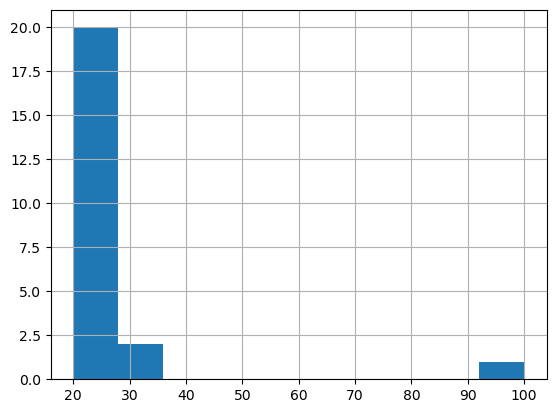

In [31]:
df['ceiling_height'].hist(range=(20, 100))

Значения больше 20 и до сорока, скорее всего, являются ошибкой, в которой при заполнении данных забыли поставить запятую, отделяющую целую и дробную часть исправить их можно, просто разделив на 10. Значение равное 100 – ошибка, но её причины неизвестны, по этому ....

In [32]:
df['ceiling_height'] = df['ceiling_height'].map(lambda x: x/10 if 20 <= x < 40 else x)

<AxesSubplot:>

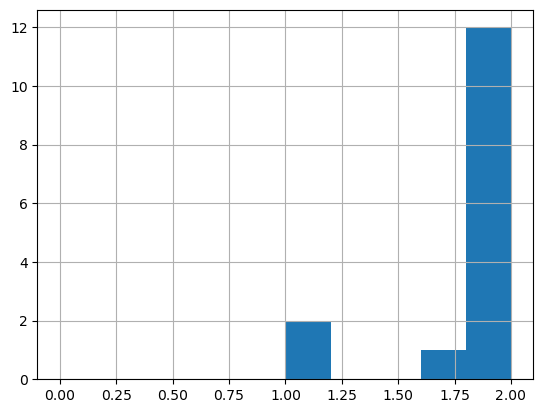

In [33]:
df['ceiling_height'].hist(range=(0, 2))

Далее рассмотрим поле `'floors_total'`:

In [34]:
print('MIN floors_total:', df['floors_total'].min())
print('MAX floors_total:', df['floors_total'].max())

MIN floors_total: 1.0
MAX floors_total: 60.0


<AxesSubplot:>

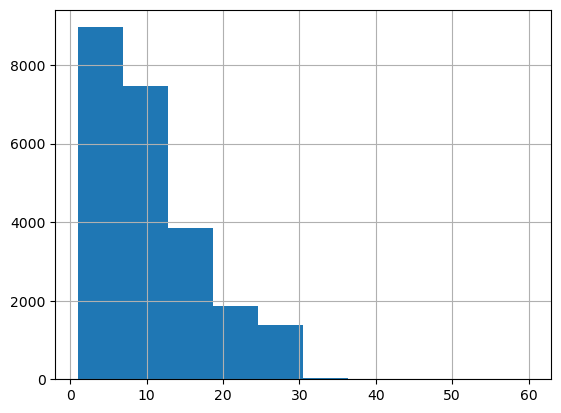

In [35]:
df['floors_total'].hist()

В целом, выглядит адекватно. 60й этаж – это конечно высоковато, но вполне может быть.

Далее рассмотрим поле `'living_area'`:

<AxesSubplot:>

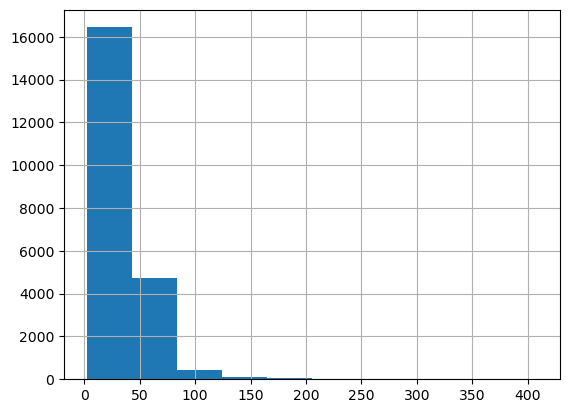

In [36]:
df['living_area'].hist()

На первый взгляд, всё выгялдит адекватно. <br>
Проверим есть ли объекты, у которых жилая площадь, превышает общую, чего быть не может

In [38]:
df[df['living_area'] > df['total_area']]['total_area'].count()

0

Таких объектов нет, что хорошо. Посмотрим на данные через boxplot

<AxesSubplot:>

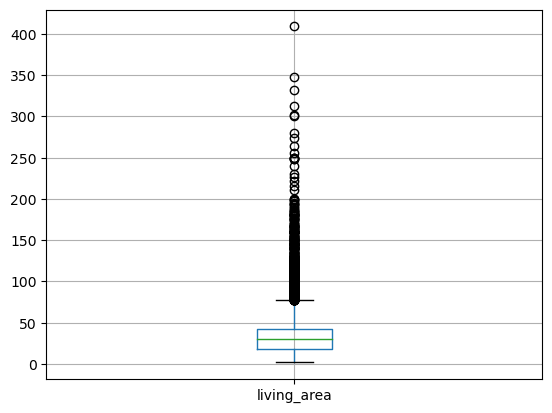

In [39]:
df.boxplot('living_area')

Имеются значение, превышающие Q3 + 1.5*IQR. Это могут быть как ошибки, так и реально большие объекты. Если это второй случай, то и цена у них будет должна быть пропорционально больше.<br>
Посмотрим на зависимость этих величин:

<AxesSubplot:xlabel='living_area', ylabel='last_price'>

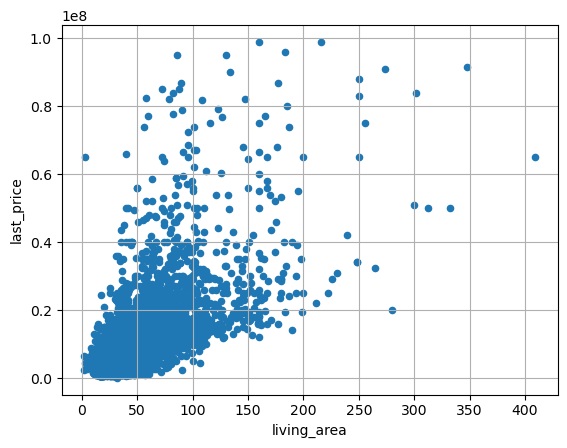

In [55]:
df.plot.scatter(x='living_area',
                  y='last_price',
                  grid=True
                  )

In [59]:
df.query("living_area > 250 and last_price < 30000000")

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
20273,12,20000000.0,460.8,2019-03-20,6,3.1,3.0,279.6,1,NaN,...,55.5,0.0,Санкт-Петербург,43756.0,15459.0,1.0,852.0,3.0,122.0,21.0


В целом, всё выглядит адекватно. Возможно в дальнейшем при расчёте средней арифмитической некоторые экстримальные значения надо будет исключить

Далее рассмотрим поле `'floor'` и `floors_total`:

In [64]:
print('Самый низкий этаж:', df['floor'].min()) # Не должно быть значений < 1 (хотя теоретически, могут быть цоколи)
print('Самыое маленькое здание:', df['floors_total'].min()) # Тут точно не должно быть значений < 1
print('Самое высокое здание:', df['floors_total'].max())
print('Самое выcоко расположенный объект:', df['floor'].max())

Самый низкий этаж: 1
Самыое маленькое здание: 1.0
Самое высокое здание: 60.0
Самое выcоко расположенный объект: 33


Отрицательных этажей нет и даже равных нулю – это хорошо. Шестидесяти этажное здание – высоковато, но адекватно.
Проверим, нет ли объектов, в которых квартира расположена выше крыши:

In [65]:
df[df['floor'] > df['floors_total']]['floor'].count()

0

Ошибок нет

Далее рассмотрим поле `'kitchen_area'`:

<AxesSubplot:>

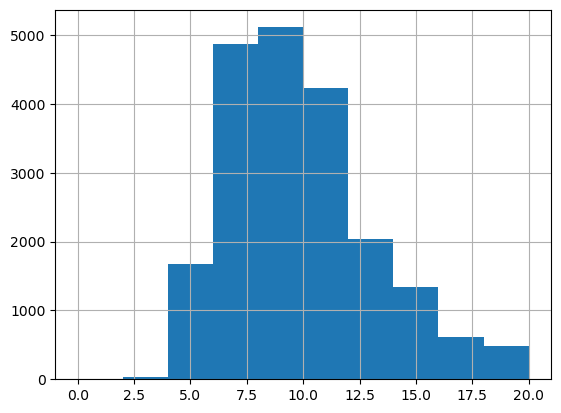

In [67]:
df['kitchen_area'].hist(range=(0, 20))

Кухня может быть даже очень большой, но она должна увеличиваться пропорционально общей площади квартиры.
Проверим это:

<AxesSubplot:xlabel='total_area', ylabel='kitchen_area'>

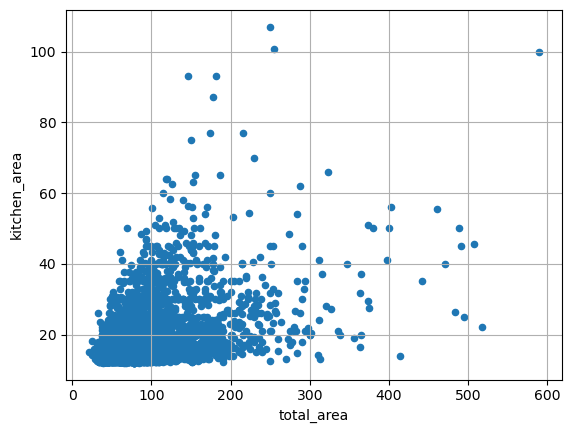

In [74]:
df[df['kitchen_area'] > 12].plot.scatter(x='total_area',
                y='kitchen_area',
                grid=True
                )

Из графика scatter plot вывод сделать не получить посмотрим на отношение площади кузни к площади всей квартиры

<AxesSubplot:>

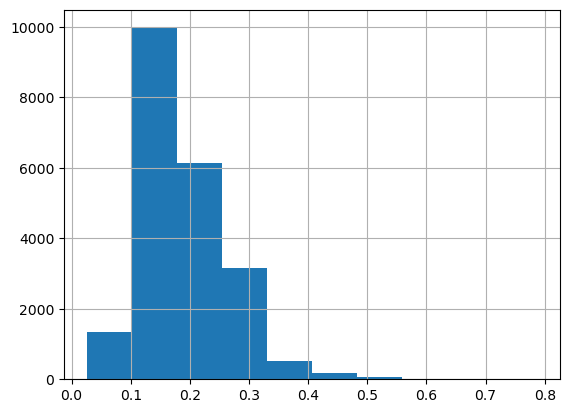

In [84]:
(df['kitchen_area'] / df['total_area']).hist()

In [87]:
df[(df['kitchen_area'] / df['total_area']) > 0.5]['kitchen_area'].count()

60

 Это странно, когда кухня занимает больше половины квартиры. И в чем тут может быть ошибка, тоже не понятно. Ну по крайней мере, таких объектов не много.

### Посчитайте и добавьте в таблицу новые столбцы

### Проведите исследовательский анализ данных

### Общий вывод

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [ ]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [ ]  определены пропущенные значения
- [ ]  заполнены пропущенные значения там, где это возможно
- [ ]  есть пояснение, какие пропущенные значения обнаружены
- [ ]  изменены типы данных
- [ ]  есть пояснение, в каких столбцах изменены типы и почему
- [ ]  устранены неявные дубликаты в названиях населённых пунктов
- [ ]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [ ]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [ ]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [ ]  посчитано и добавлено в таблицу: месяц публикации объявления
- [ ]  посчитано и добавлено в таблицу: год публикации объявления
- [ ]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [ ]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [ ]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [ ]  построены гистограммы для каждого параметра
- [ ]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [ ]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [ ]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [ ]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [ ]  в каждом этапе есть промежуточные выводы
- [ ]  есть общий вывод